# Problem Set 2

## Part 1

1. Generate simulated data with a linear relationship and some noise. Add one or two influential points, and plot the regression line with and without the influential points. Intuitively, how do you know the points you added are influential? The R functions abline and cooks.distance could be useful here.

This question is intentionally left vague! You should experiment with different values for your influential point and see how the slope is affected. Does the amount of noise in the data matter?

## Part 2
For the rest of the assignment, you'll be using biological data from several species of bats (source: Mating System and brain size in bats, Pitnick et. al.). The BodyMass, BrainMass, and TestesMass columns are all in grams. The NeoCortexVolume is in mm^3. Female Promiscuity indicates whether female bats mate with multiple males during their lifetime. Finally, diet=1 indicates a fruit-based diet; diet=2 indicates any other diet. Complete the following analysis:

1. Biologists often use log units for regression analysis. What is the underlying assumption when using log units instead of standard units? Write an equation relating x and y if we fit a linear model predicting log(y) from log(x); your equation shouldn't have any logs in it.

For the rest of the assignment, we'll trust the biologists' modeling intuition for this problem and use log units.

2. Do an exploratory data analysis of BodyMass, TestesMass, BrainMass, and NeoCortexVolume (all in log units). Describe and provide a possible explanation for the correlations that you see. Neocortical volume is often used as an indicator for higher cognitive function. How well correlated are BrainMass and NeoCortexVolume?

3. Compute a linear regression fit to predict TestesMass based on BrainMass alone, BodyMass alone, and BrainMass and BodyMass together (all in log units). Summarize your findings.

4. Compute a linear regression fit to predict TestesMass and BrainMass based on BodyMass (all in log units). Plot the residuals against FemalePromiscuity, MatingSystem, and Diet. Summarize your findings. Do these help explain the results of the previous question?

In [19]:
import numpy as np, pandas as pd,random, matplotlib.pyplot as plt
random.seed(11142016) #the date
%matplotlib inline

## Part 1

## Part 2

In [5]:
df = pd.read_csv('bat.csv',sep=',',header=0)
df.head()

,Family,BrainMass,BodyMassBrainStudy,NeoCortexVolume,TestesMass,BodyMass,Female Promiscuity,MatingSystem,Diet
0,Emballonuridae,0.26,11.5,52.5,0.03,10.0,No,polygyny,nonfruit
1,Emballonuridae,0.12,3.8,22.1,0.02,3.8,No,polygyny,nonfruit
2,Emballonuridae,NaN,NaN,NaN,0.58,100.0,No,monogamy,nonfruit
3,Emballonuridae,0.23,7.8,43.9,0.01,7.4,No,polygyny,nonfruit
4,Emballonuridae,0.16,5.1,30.0,0.03,4.1,No,monogamy,nonfruit


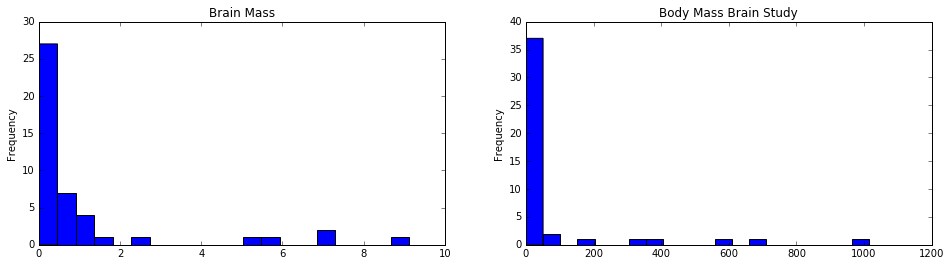

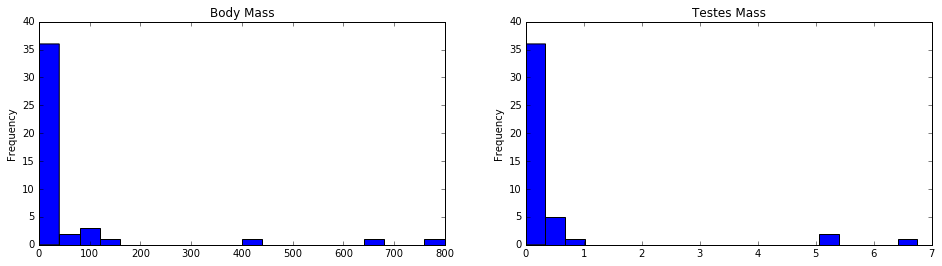

In [42]:
fig, axs = plt.subplots(1,2)
df.BrainMass.fillna(0).plot(kind='hist',bins = 20,ax=axs[0],title='Brain Mass',figsize=(16,4))
df.BodyMassBrainStudy.fillna(0).plot(kind='hist',bins = 20,ax=axs[1],title='Body Mass Brain Study',figsize=(16,4))
plt.show()
fig, axs = plt.subplots(1,2)
df.BodyMass.fillna(0).plot(kind='hist',bins = 20,ax=axs[0],title='Body Mass',figsize=(16,4))
df.TestesMass.fillna(0).plot(kind='hist',bins = 20,ax=axs[1],title='Testes Mass',figsize=(16,4))
plt.show()

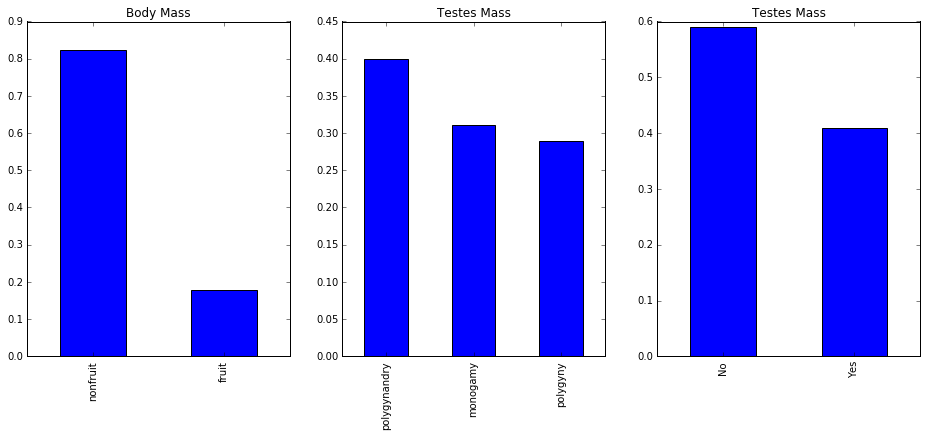

In [36]:
fig, axs = plt.subplots(1,3)
df['Diet'].value_counts('Diet').plot(kind='bar',ax=axs[0],title='Body Mass',figsize=(16,6))
df['MatingSystem'].value_counts('MatingSystem').plot(kind='bar',ax=axs[1],title='Testes Mass',figsize=(16,6))
df['Female Promiscuity'].value_counts('Female Promiscuity').plot(kind='bar',ax=axs[2],title='Testes Mass',figsize=(16,6))
plt.show()